Load Dependencies 

In [1]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.


True

In [2]:
import pandas as pd
import numpy as np

import pickle as pk

import warnings
warnings.filterwarnings("ignore")


from bs4 import BeautifulSoup
import unicodedata
import re

from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk import ne_chunk

from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from wordcloud import WordCloud



df = pd.read_csv('Dataset.csv')
df.head()

,class,message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df = df[['class', 'message']]

X_mssg = df['message'].astype(str)
Y_label = df['class'].astype(str)

df.head()

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
X_mssg.iloc[0:5]

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: message, dtype: object

In [5]:
Y_label.iloc[0:5]

0     ham
1     ham
2    spam
3     ham
4     ham
Name: class, dtype: object

Converting to lowercase 

In [6]:
df['Clean_Messages'] = X_mssg.str.lower()
df.head()

,class,message,Clean_Messages
0,ham,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ..."
1,ham,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro...","nah i don't think he goes to usf, he lives aro..."


Removing Punctuation 
[!”#$%&’()*+,-./:;<=>?@[]^_`{|}~]

In [7]:
def remove_punctuation(text):
    '''
    Removes all punctuation from a string, if present
    
    Args:
        text (str): String to which the function is to be applied, string
    
    Returns:
        Clean string without punctuations
    '''
    return re.sub(r'[^a-zA-Z0-9]', ' ', text)

In [8]:
df['removed_punctuation'] = df['Clean_Messages'].apply(remove_punctuation)
df.head()

,class,message,Clean_Messages,removed_punctuation
0,ham,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ...",go until jurong point crazy available only ...
1,ham,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...","nah i don't think he goes to usf, he lives aro...",nah i don t think he goes to usf he lives aro...


Tokenization

In [9]:
#word tokenizer
df['word_tokenized'] = df['Clean_Messages'].apply(word_tokenize)

#sentence tokenizer
df['sentence_tokenized'] = df['Clean_Messages'].apply(sent_tokenize)
df.head()

,class,message,Clean_Messages,removed_punctuation,word_tokenized,sentence_tokenized
0,ham,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ...",go until jurong point crazy available only ...,"[go, until, jurong, point, ,, crazy, .., avail...","[go until jurong point, crazy.. available only..."
1,ham,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...,ok lar joking wif u oni,"[ok, lar, ..., joking, wif, u, oni, ...]",[ok lar... joking wif u oni...]
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...",[free entry in 2 a wkly comp to win fa cup fin...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, ..., u, c, alrea...",[u dun say so early hor... u c already then sa...
4,ham,"Nah I don't think he goes to usf, he lives aro...","nah i don't think he goes to usf, he lives aro...",nah i don t think he goes to usf he lives aro...,"[nah, i, do, n't, think, he, goes, to, usf, ,,...","[nah i don't think he goes to usf, he lives ar..."


Removing stopwords 

In [10]:
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [11]:
def remove_stopwords(text):
    '''
    Removes Stop Words (also capitalized) from a string, if present
    
    Args:
        text (str): String to which the function is to be applied, string
    
    Returns:
        Clean string without Stop Words
    ''' 
    
    # check in lowercase 
    t = [token for token in text if token.lower() not in stopwords.words("english")]
    text = ' '.join(t)    
    return text

In [12]:

df['Message_WO_StopWords'] = df['word_tokenized'].apply(remove_stopwords)
df.head()

,class,message,Clean_Messages,removed_punctuation,word_tokenized,sentence_tokenized,Message_WO_StopWords
0,ham,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ...",go until jurong point crazy available only ...,"[go, until, jurong, point, ,, crazy, .., avail...","[go until jurong point, crazy.. available only...","go jurong point , crazy .. available bugis n g..."
1,ham,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...,ok lar joking wif u oni,"[ok, lar, ..., joking, wif, u, oni, ...]",[ok lar... joking wif u oni...],ok lar ... joking wif u oni ...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...",[free entry in 2 a wkly comp to win fa cup fin...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, ..., u, c, alrea...",[u dun say so early hor... u c already then sa...,u dun say early hor ... u c already say ...
4,ham,"Nah I don't think he goes to usf, he lives aro...","nah i don't think he goes to usf, he lives aro...",nah i don t think he goes to usf he lives aro...,"[nah, i, do, n't, think, he, goes, to, usf, ,,...","[nah i don't think he goes to usf, he lives ar...","nah n't think goes usf , lives around though"


Stemming

In [13]:
ps = PorterStemmer()

def stemming(text):
  stem_text = [ps.stem(word) for word in text]
  return stem_text

In [14]:
df['stemmed_message'] = df['Message_WO_StopWords'].apply(lambda x: stemming(x))
#df['stemmed_message'].tolist()
df.head()

,class,message,Clean_Messages,removed_punctuation,word_tokenized,sentence_tokenized,Message_WO_StopWords,stemmed_message
0,ham,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ...",go until jurong point crazy available only ...,"[go, until, jurong, point, ,, crazy, .., avail...","[go until jurong point, crazy.. available only...","go jurong point , crazy .. available bugis n g...","[g, o, , j, u, r, o, n, g, , p, o, i, n, t, ..."
1,ham,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...,ok lar joking wif u oni,"[ok, lar, ..., joking, wif, u, oni, ...]",[ok lar... joking wif u oni...],ok lar ... joking wif u oni ...,"[o, k, , l, a, r, , ., ., ., , j, o, k, i, ..."
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...",[free entry in 2 a wkly comp to win fa cup fin...,free entry 2 wkly comp win fa cup final tkts 2...,"[f, r, e, e, , e, n, t, r, y, , 2, , w, k, ..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, ..., u, c, alrea...",[u dun say so early hor... u c already then sa...,u dun say early hor ... u c already say ...,"[u, , d, u, n, , s, a, y, , e, a, r, l, y, ..."
4,ham,"Nah I don't think he goes to usf, he lives aro...","nah i don't think he goes to usf, he lives aro...",nah i don t think he goes to usf he lives aro...,"[nah, i, do, n't, think, he, goes, to, usf, ,,...","[nah i don't think he goes to usf, he lives ar...","nah n't think goes usf , lives around though","[n, a, h, , n, ', t, , t, h, i, n, k, , g, ..."


n-grams

In [15]:
#method to generate n-grams:
#params:
#text-the text for which we have to generate n-grams
#ngram-number of grams to be generated from the text(1,2,3,4 etc., default value=1)

def generate_N_grams(text,ngram=1):
  words=[word for word in text.split(" ") if word not in set(stopwords.words('english'))]  
  #print("Sentence after removing stopwords:",words) uncomment to see a more specific change in print output statements.
  temp=zip(*[words[i:] for i in range(0,ngram)])
  ans=[' '.join(ngram) for ngram in temp]
  return ans


In [16]:
df['n_grams_for_message'] = df['Message_WO_StopWords'].apply(generate_N_grams)
df.head()

,class,message,Clean_Messages,removed_punctuation,word_tokenized,sentence_tokenized,Message_WO_StopWords,stemmed_message,n_grams_for_message
0,ham,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ...",go until jurong point crazy available only ...,"[go, until, jurong, point, ,, crazy, .., avail...","[go until jurong point, crazy.. available only...","go jurong point , crazy .. available bugis n g...","[g, o, , j, u, r, o, n, g, , p, o, i, n, t, ...","[go, jurong, point, ,, crazy, .., available, b..."
1,ham,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...,ok lar joking wif u oni,"[ok, lar, ..., joking, wif, u, oni, ...]",[ok lar... joking wif u oni...],ok lar ... joking wif u oni ...,"[o, k, , l, a, r, , ., ., ., , j, o, k, i, ...","[ok, lar, ..., joking, wif, u, oni, ...]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...",[free entry in 2 a wkly comp to win fa cup fin...,free entry 2 wkly comp win fa cup final tkts 2...,"[f, r, e, e, , e, n, t, r, y, , 2, , w, k, ...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, ..., u, c, alrea...",[u dun say so early hor... u c already then sa...,u dun say early hor ... u c already say ...,"[u, , d, u, n, , s, a, y, , e, a, r, l, y, ...","[u, dun, say, early, hor, ..., u, c, already, ..."
4,ham,"Nah I don't think he goes to usf, he lives aro...","nah i don't think he goes to usf, he lives aro...",nah i don t think he goes to usf he lives aro...,"[nah, i, do, n't, think, he, goes, to, usf, ,,...","[nah i don't think he goes to usf, he lives ar...","nah n't think goes usf , lives around though","[n, a, h, , n, ', t, , t, h, i, n, k, , g, ...","[nah, n't, think, goes, usf, ,, lives, around,..."


Converting to integer index

In [17]:
df['tokenized_word_index'] = df['word_tokenized'].index
df.head()

,class,message,Clean_Messages,removed_punctuation,word_tokenized,sentence_tokenized,Message_WO_StopWords,stemmed_message,n_grams_for_message,tokenized_word_index
0,ham,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ...",go until jurong point crazy available only ...,"[go, until, jurong, point, ,, crazy, .., avail...","[go until jurong point, crazy.. available only...","go jurong point , crazy .. available bugis n g...","[g, o, , j, u, r, o, n, g, , p, o, i, n, t, ...","[go, jurong, point, ,, crazy, .., available, b...",0
1,ham,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...,ok lar joking wif u oni,"[ok, lar, ..., joking, wif, u, oni, ...]",[ok lar... joking wif u oni...],ok lar ... joking wif u oni ...,"[o, k, , l, a, r, , ., ., ., , j, o, k, i, ...","[ok, lar, ..., joking, wif, u, oni, ...]",1
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...",[free entry in 2 a wkly comp to win fa cup fin...,free entry 2 wkly comp win fa cup final tkts 2...,"[f, r, e, e, , e, n, t, r, y, , 2, , w, k, ...","[free, entry, 2, wkly, comp, win, fa, cup, fin...",2
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,"[u, dun, say, so, early, hor, ..., u, c, alrea...",[u dun say so early hor... u c already then sa...,u dun say early hor ... u c already say ...,"[u, , d, u, n, , s, a, y, , e, a, r, l, y, ...","[u, dun, say, early, hor, ..., u, c, already, ...",3
4,ham,"Nah I don't think he goes to usf, he lives aro...","nah i don't think he goes to usf, he lives aro...",nah i don t think he goes to usf he lives aro...,"[nah, i, do, n't, think, he, goes, to, usf, ,,...","[nah i don't think he goes to usf, he lives ar...","nah n't think goes usf , lives around though","[n, a, h, , n, ', t, , t, h, i, n, k, , g, ...","[nah, n't, think, goes, usf, ,, lives, around,...",4


In [18]:
df['tokenized_word_index'].dtypes

dtype('int64')

Set Hyperparameters/Load model dependencies

In [19]:
import keras
from keras_preprocessing.sequence import pad_sequences
from keras_preprocessing.text import Tokenizer
from keras.models import Sequential 
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Embedding
from keras.callbacks import ModelCheckpoint 
from keras.callbacks import EarlyStopping
from keras.layers import SpatialDropout1D, Conv1D, GlobalMaxPooling1D  
from keras.layers import SimpleRNN
from keras.layers import LSTM

import os
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, roc_curve
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import tensorflow as tf
%matplotlib inline

In [20]:
epochs = 8
batch_size = 128
n_dimensions = 64
n_unique_words = 5000
stop_words = 50
max_mssg_length = 100
pad_type=trunc_type = 'pre'
n_dim = 64
n_dense = 64
dropout = 0.5

drop_embed = 0.2 # convolutional model 
# convolutional layer architecture:
n_conv = 256 # filters, a.k.a. kernels
k_conv = 3 # kernel length


optimizer = 'adam'

output_dir = 'model_output/dense' # Store model's parameters after each epoch

In [21]:
X = df['message'].values
y = df['class'].values

print(X)
print(y)


label = LabelEncoder()
y=label.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=42, shuffle = True)

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'
 'Ok lar... Joking wif u oni...'
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"
 ...
 'Hi babe its me thanks for coming even though it didnt go that well!i just wanted my bed! Hope to see you soon love and kisses xxx'
 'So gd got free ice cream... I oso wan...'
 'Pls give her prometazine syrup. 5mls then  &lt;#&gt; mins later feed.']
['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [22]:
t = Tokenizer()
t.fit_on_texts(X_train)

# integer encode the documents
encoded_train = t.texts_to_sequences(X_train)
encoded_test = t.texts_to_sequences(X_test)
print(encoded_train[0:2])

[[48, 30, 248, 75, 19], [222, 47, 21, 108, 625, 1529, 2292, 1800, 1, 316, 8, 1801]]


number of label_value_counts() of the data set to show the distribution of labels.

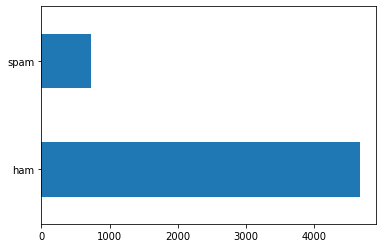

In [23]:
Y_label.value_counts().plot(kind='barh')

Preprocess Data

In [24]:
padded_train = pad_sequences(encoded_train, maxlen = max_mssg_length,
                        padding = 'pre', truncating = trunc_type, value = 0)

padded_test = pad_sequences(encoded_test, maxlen = max_mssg_length,
                        padding = 'pre', truncating = trunc_type, value = 0)
print(padded_train)

[[   0    0    0 ...  248   75   19]
 [   0    0    0 ...  316    8 1801]
 [   0    0    0 ... 2293  560  987]
 ...
 [   0    0    0 ...  254   30 7335]
 [   0    0    0 ... 1182    1  231]
 [   0    0    0 ...    8  279  174]]


Dense Neural Network architecture

In [25]:
model = Sequential()

#1st hidden layer 
model.add(Embedding(n_unique_words, n_dense, input_length = max_mssg_length))
model.add(Flatten())

#2nd hidden layer: 64 dim relu activation layer 
model.add(Dense(n_dense, activation = 'relu'))
model.add(Dropout(dropout))

#3rd hidden layer if needed more 
# model.add(Dense(n_dense, activation = 'relu'))
# model.add(Dropout(dropout))

#Output layer: Single sigmoid neuron to predict binary classification 
model.add(Dense(1, activation='sigmoid')) #= to softmax w/ 2 classes 

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 64)           320000    
                                                                 
 flatten (Flatten)           (None, 6400)              0         
                                                                 
 dense (Dense)               (None, 64)                409664    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 729,729
Trainable params: 729,729
Non-trainable params: 0
_________________________________________________________________


In [27]:
n_dim, n_unique_words, n_dim*n_unique_words

(64, 5000, 320000)

In [28]:
max_mssg_length, n_dim, n_dim*max_mssg_length

(100, 64, 6400)

In [29]:
n_dense, n_dim*max_mssg_length*n_dense + n_dense #weights + biases

(64, 409664)

In [30]:
n_dense + 1

65

Configure Model

In [31]:
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

#allow to save our model param after each epoch during training 
modelcheckpoint = ModelCheckpoint(filepath=output_dir+
                                  "/weights.{epoch:02d}.hdf5")

#if the output_dir directory doesn't already exist, we use the makedirs() metho to make it 
if not os.path.exists(output_dir):
  os.makedirs(output_dir)

Train Dense Model

In [32]:
#early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

history = model.fit(x=padded_train,y = y_train,
          batch_size=batch_size, epochs=epochs, verbose=1,
          validation_data=(padded_test,y_test),
          callbacks=[modelcheckpoint])

#remember check the validation accuracy if it keeps decreasing we over fit the models

Epoch 1/8
30/30 [==============================] - 3s 13ms/step - loss: 0.3563 - accuracy: 0.8610 - val_loss: 0.2401 - val_accuracy: 0.8662
Epoch 2/8
30/30 [==============================] - 0s 8ms/step - loss: 0.1787 - accuracy: 0.8832 - val_loss: 0.1639 - val_accuracy: 0.9562
Epoch 3/8
30/30 [==============================] - 0s 7ms/step - loss: 0.1288 - accuracy: 0.9738 - val_loss: 0.1442 - val_accuracy: 0.9710
Epoch 4/8
30/30 [==============================] - 0s 7ms/step - loss: 0.1097 - accuracy: 0.9863 - val_loss: 0.1338 - val_accuracy: 0.9753
Epoch 5/8
30/30 [==============================] - 0s 6ms/step - loss: 0.1004 - accuracy: 0.9929 - val_loss: 0.1350 - val_accuracy: 0.9766
Epoch 6/8
30/30 [==============================] - 0s 8ms/step - loss: 0.0949 - accuracy: 0.9960 - val_loss: 0.1379 - val_accuracy: 0.9766
Epoch 7/8
30/30 [==============================] - 0s 8ms/step - loss: 0.0904 - accuracy: 0.9974 - val_loss: 0.1419 - val_accuracy: 0.9760
Epoch 8/8
30/30 [=========

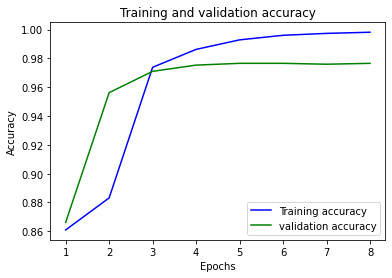

In [33]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,9)
plt.plot(epochs, loss_train, 'b', label = 'Training accuracy')
plt.plot(epochs, loss_val, 'g', label = 'validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

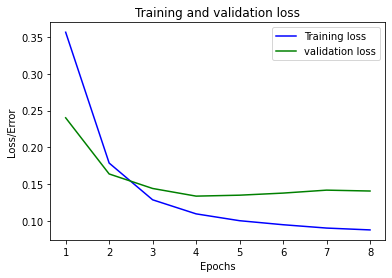

In [34]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,9)
plt.plot(epochs, loss_train, 'b', label = 'Training loss')
plt.plot(epochs, loss_val, 'g', label = 'validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss/Error')
plt.legend()
plt.show()

In [35]:
test_loss, test_acc = model.evaluate(padded_test,y_test)
print('test_acc:', test_acc)

51/51 [==============================] - 0s 2ms/step - loss: 0.1407 - accuracy: 0.9766
test_acc: 0.9765721559524536


In [36]:
model.load_weights(output_dir+"/weights.01.hdf5")


In [37]:
#Predict probablity on our validation data to calc yhat data across 25k data 
y_hat = model.predict(padded_test)

51/51 [==============================] - 0s 1ms/step


In [38]:
pct_auc = roc_auc_score(y_test, y_hat)*100.0

In [39]:
"{:0.2f}".format(pct_auc)

'93.22'

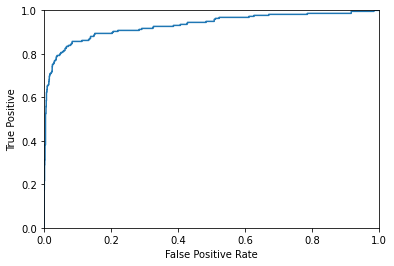

In [40]:
fpr, tpr, thresholds = roc_curve (y_test,y_hat)
plt.plot(fpr,tpr)
plt.axis([0,1,0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive')
plt.show()

Convolutional Model 

In [41]:
n_dense = 256
dropout = 0.2
output_dir = 'model_output/conv'

modelCNN = Sequential()
# 1st hidden layer: vector-space embedding
modelCNN.add(Embedding(n_unique_words, n_dim, input_length=max_mssg_length)) 
modelCNN.add(SpatialDropout1D(drop_embed)) # no Flatten(),Conv1D() layer takes multidimension

# 2nd hidden layer : convolutional layer
# We use relu activation within our one-dimensional convolutional layer. The layer has 
# 256 unique filters, each of which is free to specialize in activating when it passes over 
# a particular three-token sequence. The activation map for each of the 256 filters has a 
# length of 398, corresponding to a 398×256 output shape
modelCNN.add(Conv1D(n_conv, k_conv, activation='relu'))
# model.add(Conv1D(n_conv, k_conv, activation='relu')) # can add more hidden layer

# Global max-pooling is common for dimensionality reduction within deep learning NLP models. 
# We use it here to squash the activation map from 398 × 256 to 1 × 256. By applying it, only 
# the magnitude of largest activation for a given convolutional filter is retained by the 
# maximum-calculating operation, and we lose any temporal-position-specific information the 
#filter may have output to its 398-element-long activation map
modelCNN.add(GlobalMaxPooling1D()) # not a hidden layer

# Dense layer
# Because the activations output from the global max-pooling layer are one-dimensional, 
#they can be fed directly into the dense layer, which consists (again) of relu neurons and 
# dropout is applied
modelCNN.add(Dense(n_dense, activation='relu'))
modelCNN.add(Dropout(dropout))

# Output layer
modelCNN.add(Dense(1, activation='sigmoid'))

model summary

In [42]:
modelCNN.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 64)           320000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 100, 64)          0         
 ropout1D)                                                       
                                                                 
 conv1d (Conv1D)             (None, 98, 256)           49408     
                                                                 
 global_max_pooling1d (Globa  (None, 256)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)              

configure model

In [43]:
modelCNN.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

#allow to save our model param after each epoch during training 
modelcheckpoint = ModelCheckpoint(filepath=output_dir+
                                  "/weights.{epoch:02d}.hdf5")

#if the output_dir directory doesn't already exist, we use the makedirs() metho to make it 
if not os.path.exists(output_dir):
  os.makedirs(output_dir)

Train

In [44]:
history=modelCNN.fit(x=padded_train,y = y_train,
          batch_size=batch_size, epochs=8, verbose=1,
          validation_data=(padded_test,y_test),
          callbacks=[modelcheckpoint])

Epoch 1/8
30/30 [==============================] - 8s 40ms/step - loss: 0.4550 - accuracy: 0.8406 - val_loss: 0.3719 - val_accuracy: 0.8662
Epoch 2/8
30/30 [==============================] - 0s 10ms/step - loss: 0.3238 - accuracy: 0.8655 - val_loss: 0.2637 - val_accuracy: 0.8662
Epoch 3/8
30/30 [==============================] - 0s 8ms/step - loss: 0.1997 - accuracy: 0.9093 - val_loss: 0.1605 - val_accuracy: 0.9667
Epoch 4/8
30/30 [==============================] - 0s 9ms/step - loss: 0.0770 - accuracy: 0.9855 - val_loss: 0.0602 - val_accuracy: 0.9797
Epoch 5/8
30/30 [==============================] - 0s 9ms/step - loss: 0.0237 - accuracy: 0.9937 - val_loss: 0.0651 - val_accuracy: 0.9871
Epoch 6/8
30/30 [==============================] - 0s 9ms/step - loss: 0.0095 - accuracy: 0.9976 - val_loss: 0.0626 - val_accuracy: 0.9809
Epoch 7/8
30/30 [==============================] - 0s 9ms/step - loss: 0.0039 - accuracy: 0.9995 - val_loss: 0.0688 - val_accuracy: 0.9871
Epoch 8/8
30/30 [========

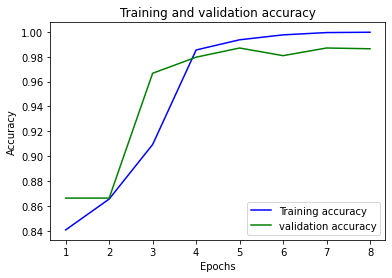

In [45]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,9)
plt.plot(epochs, loss_train, 'b', label = 'Training accuracy')
plt.plot(epochs, loss_val, 'g', label = 'validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

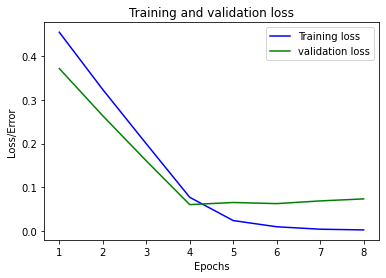

In [46]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,9)
plt.plot(epochs, loss_train, 'b', label = 'Training loss')
plt.plot(epochs, loss_val, 'g', label = 'validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss/Error')
plt.legend()
plt.show()

Evaluate

In [47]:
modelCNN.load_weights(output_dir+"/weights.08.hdf5") 
y_hat = modelCNN.predict(padded_test)

51/51 [==============================] - 0s 4ms/step


In [48]:
"{:0.2f}".format(roc_auc_score(y_test, y_hat)*100.0)

'98.87'

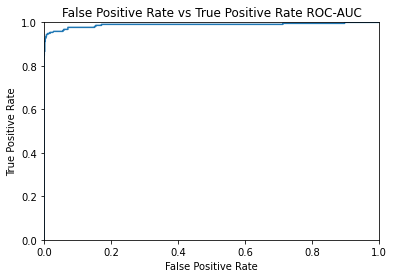

In [49]:
fpr , tpr , thresholds = roc_curve (y_test , y_hat)
plt.plot(fpr,tpr) 
plt.axis([0,1,0,1]) 
plt.title('False Positive Rate vs True Positive Rate ROC-AUC')
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.show()

RNN model

RNN hyperparameters

In [50]:
output_dir = 'model_output/rnn'
epochs = 16
n_unique_words = 10000
drom_embed = 0.2
n_rnn = 256
drop_rnn = 0.2
max_mssg_length = 100

RNN NN architecture

In [51]:
modelRNN = Sequential()

#1st hidden layer 
modelRNN.add(Embedding(n_unique_words, n_dim, input_length = max_mssg_length))
modelRNN.add(SpatialDropout1D(drop_embed))

#2nd hidden layer: 
modelRNN.add(SimpleRNN(n_rnn, dropout=drop_rnn))

#Output layer
modelRNN.add(Dense(1, activation='sigmoid')) 

modelRNN.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 64)           640000    
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 100, 64)          0         
 lDropout1D)                                                     
                                                                 
 simple_rnn (SimpleRNN)      (None, 256)               82176     
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 722,433
Trainable params: 722,433
Non-trainable params: 0
_________________________________________________________________


Model Fit

In [52]:
modelRNN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#allow to save our model param after each epoch during training 
modelcheckpoint = ModelCheckpoint(filepath=output_dir+
                                  "/weights.{epoch:02d}.hdf5")

#if the output_dir directory doesn't already exist, we use the makedirs() metho to make it 
if not os.path.exists(output_dir):
  os.makedirs(output_dir)

history = modelRNN.fit(x=padded_train,y = y_train,
          batch_size=batch_size, epochs=epochs, verbose=1,
          validation_data=(padded_test,y_test),
          callbacks=[modelcheckpoint])

Epoch 1/16
30/30 [==============================] - 5s 138ms/step - loss: 0.4168 - accuracy: 0.8472 - val_loss: 0.3868 - val_accuracy: 0.8662
Epoch 2/16
30/30 [==============================] - 4s 130ms/step - loss: 0.4020 - accuracy: 0.8565 - val_loss: 0.3828 - val_accuracy: 0.8662
Epoch 3/16
30/30 [==============================] - 5s 169ms/step - loss: 0.3567 - accuracy: 0.8655 - val_loss: 0.3340 - val_accuracy: 0.8662
Epoch 4/16
30/30 [==============================] - 4s 131ms/step - loss: 0.2476 - accuracy: 0.8961 - val_loss: 0.1866 - val_accuracy: 0.9525
Epoch 5/16
30/30 [==============================] - 4s 130ms/step - loss: 0.0834 - accuracy: 0.9744 - val_loss: 0.1284 - val_accuracy: 0.9587
Epoch 6/16
30/30 [==============================] - 4s 128ms/step - loss: 0.0247 - accuracy: 0.9934 - val_loss: 0.0796 - val_accuracy: 0.9747
Epoch 7/16
30/30 [==============================] - 4s 131ms/step - loss: 0.0095 - accuracy: 0.9968 - val_loss: 0.0782 - val_accuracy: 0.9760
Epoch 

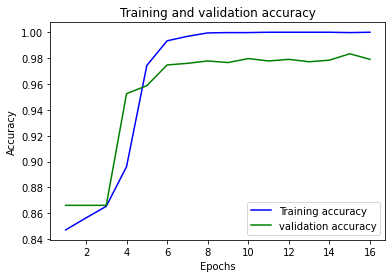

In [53]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,17)
plt.plot(epochs, loss_train, 'b', label = 'Training accuracy')
plt.plot(epochs, loss_val, 'g', label = 'validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

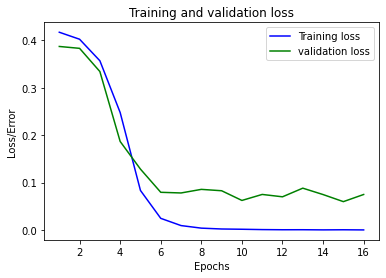

In [54]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,17)
plt.plot(epochs, loss_train, 'b', label = 'Training loss')
plt.plot(epochs, loss_val, 'g', label = 'validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss/Error')
plt.legend()
plt.show()

Evaluate

In [55]:

modelRNN.load_weights(output_dir+"/weights.16.hdf5") 


In [56]:
y_hat = modelRNN.predict(padded_test)

51/51 [==============================] - 1s 10ms/step


In [57]:
"{:0.2f}".format(roc_auc_score(y_test, y_hat)*100.0)

'98.95'

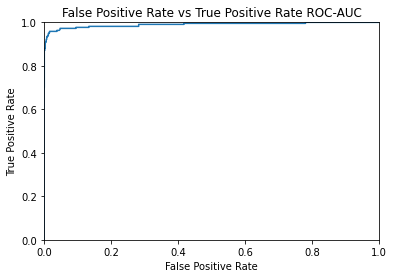

In [58]:
fpr , tpr , thresholds = roc_curve (y_test , y_hat)
plt.plot(fpr,tpr) 
plt.axis([0,1,0,1]) 
plt.title('False Positive Rate vs True Positive Rate ROC-AUC')
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.show()

LSTM

hyperparameters for LSTM model

In [59]:
output_dir = 'model_output/LSTM'
epochs = 4
n_unique_words = 10000
drop_embed = 0.2

n_lstm=256
drop_lstm = 0.2


LSTM neural Network architecture

In [60]:
modelLSTM = Sequential()

#1st hidden layer 
modelLSTM.add(Embedding(n_unique_words, n_dim, input_length = max_mssg_length))
modelLSTM.add(SpatialDropout1D(drop_embed))

#2nd hidden layer: 
modelLSTM.add(LSTM(n_lstm, dropout=drop_lstm))

#Output layer
modelLSTM.add(Dense(1, activation='sigmoid')) 

modelLSTM.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 64)           640000    
                                                                 
 spatial_dropout1d_2 (Spatia  (None, 100, 64)          0         
 lDropout1D)                                                     
                                                                 
 lstm (LSTM)                 (None, 256)               328704    
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 968,961
Trainable params: 968,961
Non-trainable params: 0
_________________________________________________________________


configure LSTM model

In [61]:
modelLSTM.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#allow to save our model param after each epoch during training 
modelcheckpoint = ModelCheckpoint(filepath=output_dir+
                                  "/weights.{epoch:02d}.hdf5")

#if the output_dir directory doesn't already exist, we use the makedirs() metho to make it 
if not os.path.exists(output_dir):
  os.makedirs(output_dir)

history = modelLSTM.fit(x=padded_train,y = y_train,
          batch_size=batch_size, epochs=epochs, verbose=1,
          validation_data=(padded_test,y_test),
          callbacks=[modelcheckpoint])

Epoch 1/4
30/30 [==============================] - 4s 39ms/step - loss: 0.3735 - accuracy: 0.8652 - val_loss: 0.1558 - val_accuracy: 0.9753
Epoch 2/4
30/30 [==============================] - 1s 19ms/step - loss: 0.0755 - accuracy: 0.9799 - val_loss: 0.0784 - val_accuracy: 0.9766
Epoch 3/4
30/30 [==============================] - 1s 18ms/step - loss: 0.0372 - accuracy: 0.9905 - val_loss: 0.0934 - val_accuracy: 0.9753
Epoch 4/4
30/30 [==============================] - 1s 21ms/step - loss: 0.0258 - accuracy: 0.9934 - val_loss: 0.0530 - val_accuracy: 0.9846


Train LSTM model 

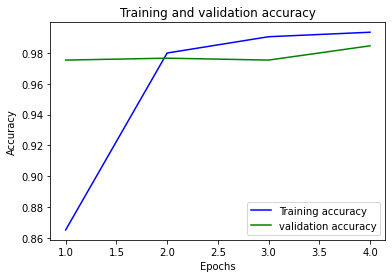

In [62]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,5)
plt.plot(epochs, loss_train, 'b', label = 'Training accuracy')
plt.plot(epochs, loss_val, 'g', label = 'validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

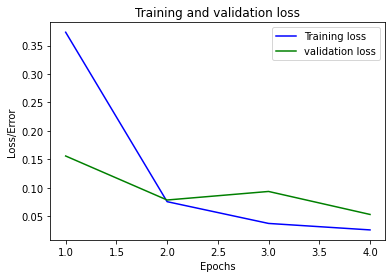

In [63]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,5)
plt.plot(epochs, loss_train, 'b', label = 'Training loss')
plt.plot(epochs, loss_val, 'g', label = 'validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss/Error')
plt.legend()
plt.show()

Evaluate LSTM model

In [64]:
modelLSTM.load_weights(output_dir+"/weights.01.hdf5")
y_hat = modelLSTM.predict(padded_test)

51/51 [==============================] - 1s 4ms/step


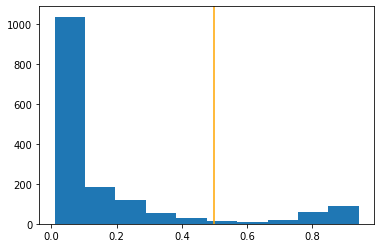

In [65]:
plt.hist(y_hat)
_ = plt.axvline(x=0.5, color='orange')

In [66]:
"{:0.2f}".format(roc_auc_score(y_test, y_hat)*100.0)

'95.12'

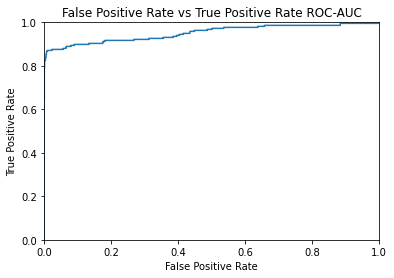

In [67]:
fpr , tpr , thresholds = roc_curve (y_test , y_hat)
plt.plot(fpr,tpr) 
plt.axis([0,1,0,1]) 
plt.title('False Positive Rate vs True Positive Rate ROC-AUC')
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.show()

6.) Tune the best model.
    This was our CNN model which had a ROC_AUC score of 98.93
    The only tuning we'll use is to increase the number of epochs

In [68]:
n_dense = 256
dropout = 0.2
output_dir = 'model_output/conv_tuned'
epochs = 20

modelCNNtuned = Sequential()
# 1st hidden layer: vector-space embedding
modelCNNtuned.add(Embedding(n_unique_words, n_dim, input_length=max_mssg_length)) 
modelCNNtuned.add(SpatialDropout1D(drop_embed)) # no Flatten(),Conv1D() layer takes multidimension

# 2nd hidden layer : convolutional layer
# We use relu activation within our one-dimensional convolutional layer. The layer has 
# 256 unique filters, each of which is free to specialize in activating when it passes over 
# a particular three-token sequence. The activation map for each of the 256 filters has a 
# length of 398, corresponding to a 398×256 output shape
modelCNNtuned.add(Conv1D(n_conv, k_conv, activation='relu'))
# model.add(Conv1D(n_conv, k_conv, activation='relu')) # can add more hidden layer

# Global max-pooling is common for dimensionality reduction within deep learning NLP models. 
# We use it here to squash the activation map from 398 × 256 to 1 × 256. By applying it, only 
# the magnitude of largest activation for a given convolutional filter is retained by the 
# maximum-calculating operation, and we lose any temporal-position-specific information the 
#filter may have output to its 398-element-long activation map
modelCNNtuned.add(GlobalMaxPooling1D()) # not a hidden layer

# Dense layer
# Because the activations output from the global max-pooling layer are one-dimensional, 
#they can be fed directly into the dense layer, which consists (again) of relu neurons and 
# dropout is applied
modelCNNtuned.add(Dense(n_dense, activation='relu'))
modelCNNtuned.add(Dropout(dropout))

# Output layer
modelCNNtuned.add(Dense(1, activation='sigmoid'))

In [69]:
modelCNNtuned.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 64)           640000    
                                                                 
 spatial_dropout1d_3 (Spatia  (None, 100, 64)          0         
 lDropout1D)                                                     
                                                                 
 conv1d_1 (Conv1D)           (None, 98, 256)           49408     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 256)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_6 (Dense)             (None, 256)               65792     
                                                                 
 dropout_2 (Dropout)         (None, 256)              

In [70]:
modelCNNtuned.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#allow to save our model param after each epoch during training 
modelcheckpoint = ModelCheckpoint(filepath=output_dir+
                                  "/weights.{epoch:02d}.hdf5")

#if the output_dir directory doesn't already exist, we use the makedirs() metho to make it 
if not os.path.exists(output_dir):
  os.makedirs(output_dir)

In [71]:
history = modelCNNtuned.fit(x=padded_train,y = y_train,
          batch_size=batch_size, epochs=epochs, verbose=1,
          validation_data=(padded_test,y_test),
          callbacks=[modelcheckpoint])

Epoch 1/20
30/30 [==============================] - 1s 15ms/step - loss: 0.4625 - accuracy: 0.8417 - val_loss: 0.3835 - val_accuracy: 0.8662
Epoch 2/20
30/30 [==============================] - 0s 10ms/step - loss: 0.3431 - accuracy: 0.8655 - val_loss: 0.2826 - val_accuracy: 0.8662
Epoch 3/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2104 - accuracy: 0.8972 - val_loss: 0.1605 - val_accuracy: 0.9642
Epoch 4/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0693 - accuracy: 0.9852 - val_loss: 0.0561 - val_accuracy: 0.9827
Epoch 5/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0170 - accuracy: 0.9955 - val_loss: 0.0527 - val_accuracy: 0.9840
Epoch 6/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0071 - accuracy: 0.9981 - val_loss: 0.0564 - val_accuracy: 0.9852
Epoch 7/20
30/30 [==============================] - 0s 9ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0615 - val_accuracy: 0.9852
Epoch 8/20
30/

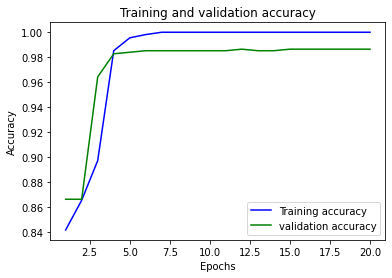

In [72]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,21)
plt.plot(epochs, loss_train, 'b', label = 'Training accuracy')
plt.plot(epochs, loss_val, 'g', label = 'validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

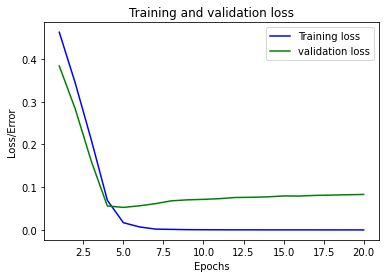

In [73]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,21)
plt.plot(epochs, loss_train, 'b', label = 'Training loss')
plt.plot(epochs, loss_val, 'g', label = 'validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss/Error')
plt.legend()
plt.show()

In [74]:
modelCNNtuned.load_weights(output_dir+"/weights.15.hdf5") 
y_hat = modelCNN.predict(padded_test)

51/51 [==============================] - 0s 2ms/step


In [75]:
"{:0.2f}".format(roc_auc_score(y_test, y_hat)*100.0)

'98.87'

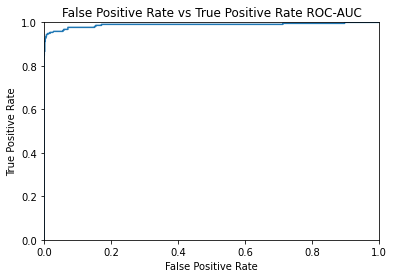

In [76]:
fpr , tpr , thresholds = roc_curve (y_test , y_hat)
plt.plot(fpr,tpr) 
plt.axis([0,1,0,1]) 
plt.title('False Positive Rate vs True Positive Rate ROC-AUC')
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.show()